# SETUP

In [8]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from math import log

In [9]:
car_sales_df = pd.read_csv("/Users/lorenzo/Desktop/Programmazione/python/5 marzo MACCHINE/data/car_prices.csv",sep=",")

In [10]:
car_sales_df.head()
#DATAFRAME CORRETTAMENTE IMPORTATO

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [11]:
#COPIA DATAFRAME
df = car_sales_df.copy()



# ANALISI ESPLORATIVA

In [12]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [13]:
#TRAMITE DESCRIBE VEDIAMO CHE QUASI TUTTE LE COLONNE NUMERICHE HANNO UNA STD MOLTO ALTA
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [14]:
#GUARDIAMO QUANTI SONO I NULL PER OGNI COLONNA
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [15]:
#df.loc(df["make"].isna() & df["model"].isna())

In [16]:
#FREQUENZE PERCENTILI DEI NaN
(df.isnull().sum()/(len(df)))*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

La trasmissione è il dato più sporco, con l'11% di dati NaN

In [17]:
#MARCHE PIU' VENDUTE
df["make"].value_counts().head(5)

Ford         93554
Chevrolet    60197
Nissan       53946
Toyota       39871
Dodge        30710
Name: make, dtype: int64

In [18]:
#TIPOLOGIA DI MACCHINE PIU' VENDUTE
df["body"].value_counts().head(5)

Sedan        199437
SUV          119292
sedan         41906
suv           24552
Hatchback     21380
Name: body, dtype: int64

In [19]:
df["transmission"].value_counts()

automatic    475915
manual        17544
sedan            15
Sedan            11
Name: transmission, dtype: int64

In [20]:
df["interior"].value_counts()

black        244329
gray         178581
beige         59758
tan           44093
—             17077
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: interior, dtype: int64

In [21]:
df["body"].value_counts()

Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
cab plus 4          1
g37 coupe           1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: body, Length: 87, dtype: int64

In [22]:
df["interior"].value_counts()

black        244329
gray         178581
beige         59758
tan           44093
—             17077
brown          8640
red            1363
blue           1143
silver         1104
off-white       480
purple          339
gold            324
white           256
green           245
burgundy        191
orange          145
yellow           20
Name: interior, dtype: int64

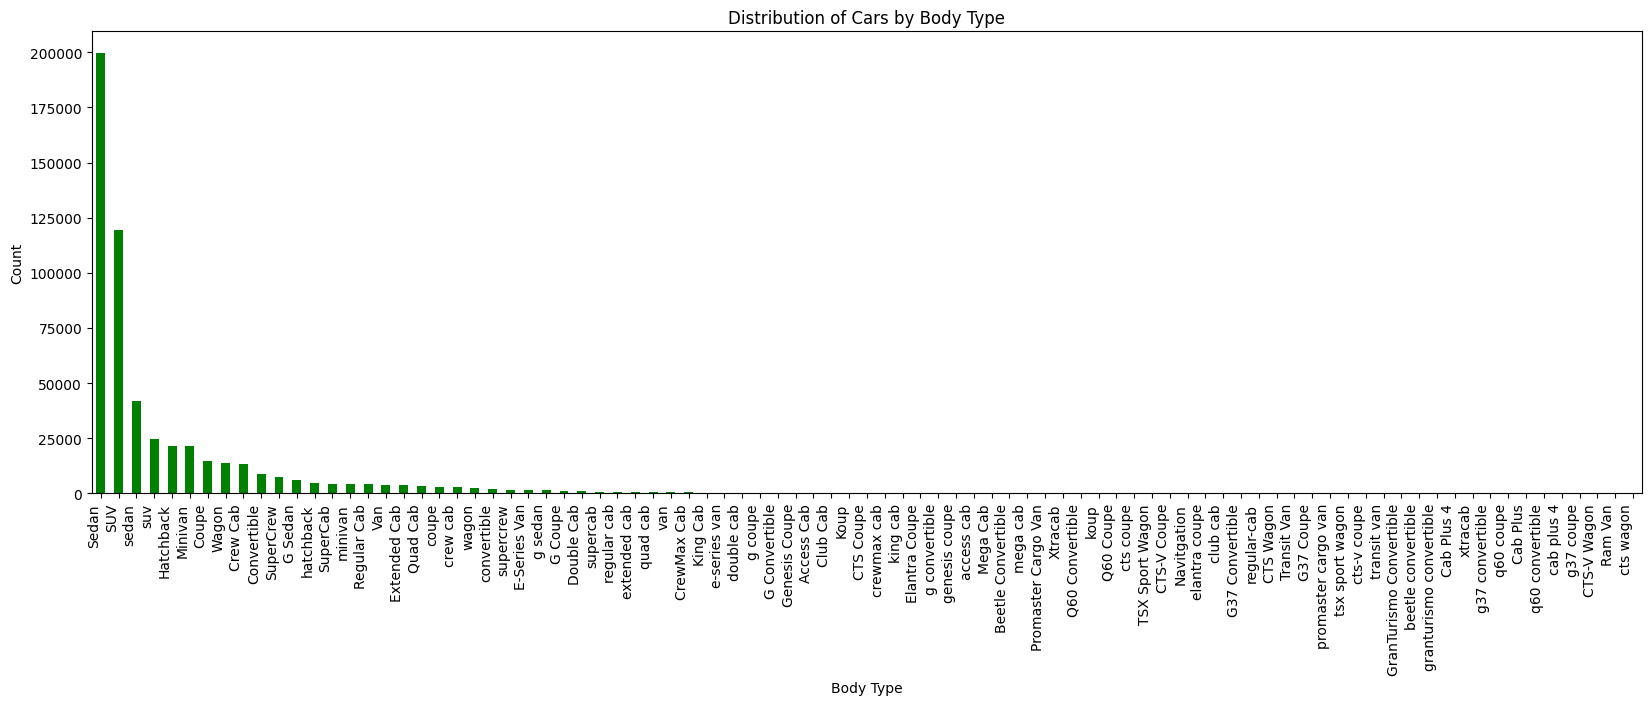

In [23]:
plt.figure(figsize=(20, 6))
df['body'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Cars by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

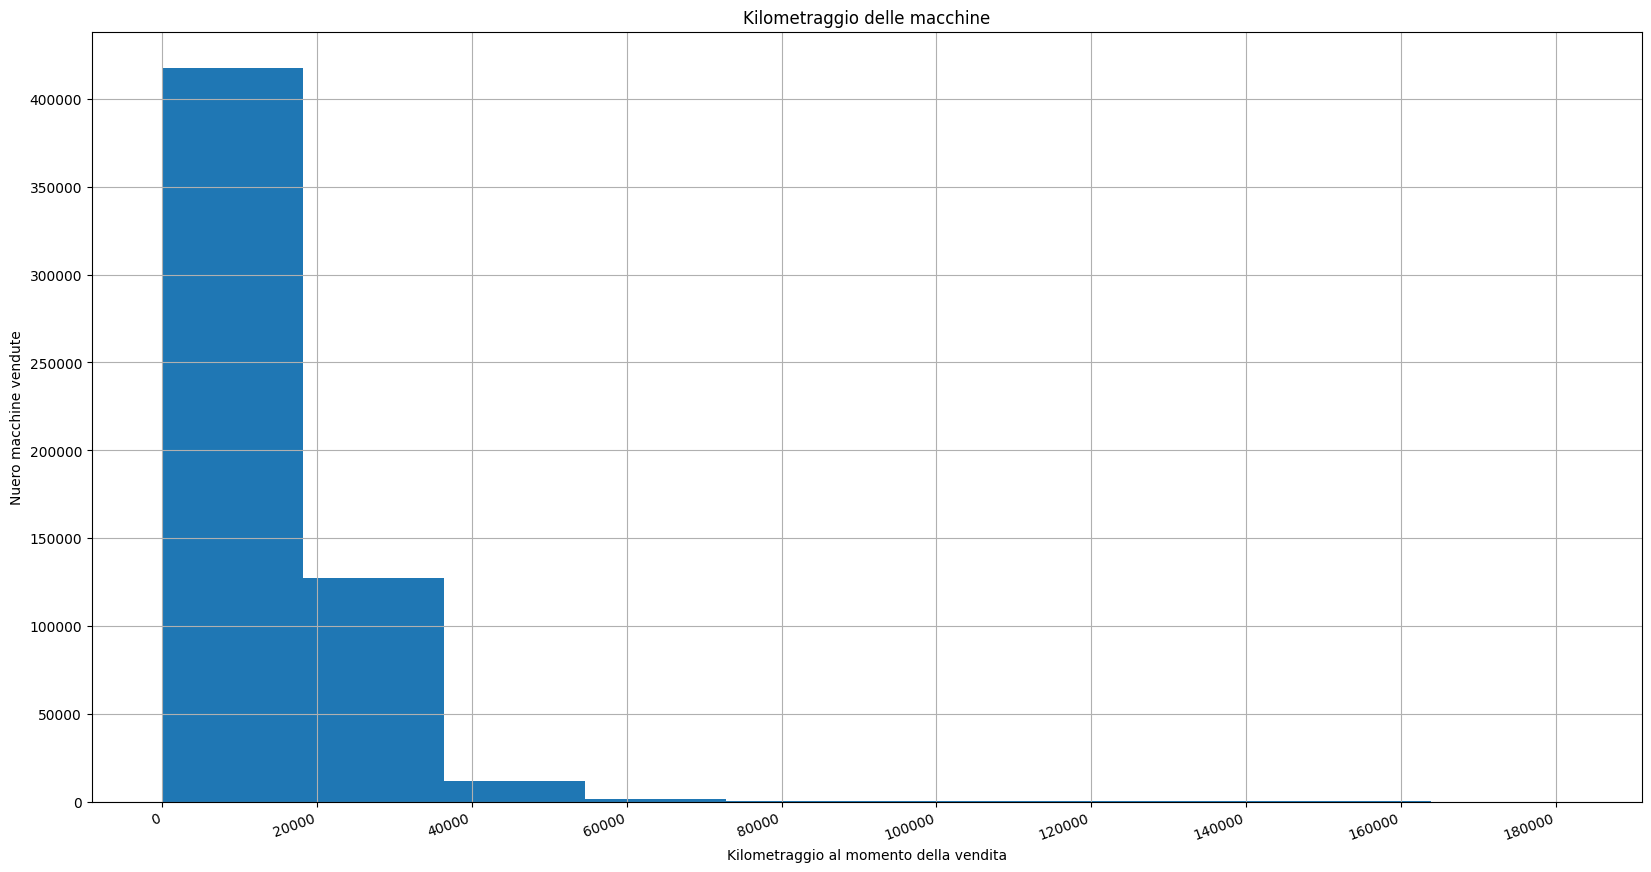

In [24]:
plt.figure(figsize=(20, 10))
df['mmr'].hist()
plt.title('Kilometraggio delle macchine')
plt.xlabel('Kilometraggio al momento della vendita')
plt.ylabel('Nuero macchine vendute')
plt.xticks(rotation=20, ha='right')
plt.locator_params(axis='x', nbins=20) 
plt.show()

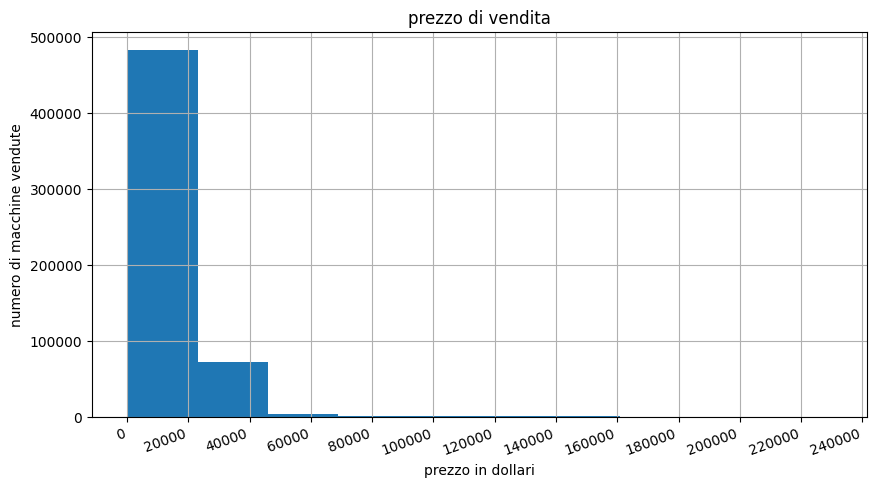

In [25]:
plt.figure(figsize=(10, 5))
df['sellingprice'].hist()
plt.title('prezzo di vendita')
plt.xlabel('prezzo in dollari')
plt.ylabel('numero di macchine vendute')
plt.xticks(rotation=20, ha='right') 
plt.locator_params(axis='x', nbins=20) 
plt.show()

In [26]:
#NUMERO DI ENTRATE UNICHE PER OGNI CATEGORIA
df.nunique()

year                34
make                96
model              973
trim              1963
body                87
transmission         4
vin             550297
state               64
condition           41
odometer        172278
color               46
interior            17
seller           14263
mmr               1101
sellingprice      1887
saledate          3766
dtype: int64

In [27]:
percentage_null = (df.isnull().sum()/(len(df)))*100

# PULIZIA DATI

### Pulizia None

In [28]:
df.dropna(subset=['vin'], inplace=True)
df.dropna(subset=['saledate'], inplace=True)

In [29]:
df["vin"].isnull().sum()

0

In [30]:
plt.barh(y= df["transmission"])
'''plt.title('Kilometraggio delle macchine')
plt.xlabel('Kilometraggio al momento della vendita')
plt.ylabel('Nuero macchine vendute')
plt.xticks(rotation=20, ha='right')
plt.locator_params(axis='x', nbins=20) 
plt.show()'''

TypeError: barh() missing 1 required positional argument: 'width'

In [ ]:
df["make"].fillna("Other", inplace= True)
df['model'].fillna('Other', inplace=True)
df['trim'].fillna('Other', inplace=True)
df['color'].fillna('Other', inplace=True)

In [ ]:
df["transmission"].fillna(df['transmission'].mode()[0], inplace=True)
df["body"].fillna(df["body"].mode()[0], inplace=True)
df["interior"].fillna(df["interior"].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

year                0
make                0
model               0
trim                0
body                0
transmission        0
vin                 0
state               0
condition       11816
odometer           94
color               0
interior            0
seller              0
mmr                22
sellingprice        0
saledate            0
dtype: int64

### Pulizia None numerici

In [ ]:
df['condition'].fillna(df['condition'].mean(), inplace=True)
df['odometer'].fillna(df['odometer'].mean(), inplace=True)
df['mmr'].fillna(df['mmr'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

### PULIZIA DUPLICATI

In [ ]:
#DATI DUPLICATI NELLA COLONNA VIN
df.duplicated("vin").sum()

8536

In [ ]:
df[df.duplicated("vin")].sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
534431,2013,GMC,Sierra 1500,SLE,crew cab,automatic,3gtp2ve76dg267284,pa,49.0,31237.0,black,black,usautoland inc,27800.0,27200.0,Fri Jun 12 2015 02:00:00 GMT-0700 (PDT)
384812,2005,Nissan,Altima,3.5 SL,Sedan,automatic,1n4bl11d25c113788,ca,21.0,67305.0,silver,black,aaero sweet corporation,4300.0,6800.0,Wed Mar 04 2015 03:30:00 GMT-0800 (PST)
77487,2006,Ford,Explorer,XLT,SUV,automatic,1fmeu63e56ub65527,fl,21.0,96534.0,black,tan,meridian remarketing,4900.0,3100.0,Tue Jan 20 2015 01:15:00 GMT-0800 (PST)
287098,2009,Dodge,Caliber,SXT,Wagon,automatic,1b3hb48a59d143132,ca,24.0,111880.0,white,black,tdaf remarketing,4025.0,3900.0,Tue Feb 10 2015 04:30:00 GMT-0800 (PST)
515021,2008,BMW,X5,3.0si,suv,automatic,5uxfe43548l036082,nc,4.0,84747.0,gray,brown,atlantic coast remarketing inc/kdi,15350.0,15900.0,Mon Jun 08 2015 02:30:00 GMT-0700 (PDT)


In [ ]:
#IN QUESTO CASO LA MACCHINA E' STATA RIVENDUTA DOPO POCO
df[df["vin"]=="3n1ab61e58l718656"]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
135919,2008,Nissan,Sentra,2,Sedan,automatic,3n1ab61e58l718656,ca,29.0,91830.0,white,beige,ideal transportation,4725.0,4900.0,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
296867,2008,Nissan,Sentra,2,Sedan,automatic,3n1ab61e58l718656,ca,29.0,91934.0,white,beige,ideal transportation,4825.0,5500.0,Wed Feb 11 2015 04:30:00 GMT-0800 (PST)


In [ ]:
#ANCHE IN QUESTO CASO LA MACCHINA E' STATA VENDUTA PIU' VOLTE
df[df["vin"]=="3fahp0ha8cr441199"]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
79761,2012,Ford,Fusion,SE,Sedan,automatic,3fahp0ha8cr441199,nj,19.0,46009.0,silver,black,emkay inc,10750.0,7200.0,Wed Jan 21 2015 01:30:00 GMT-0800 (PST)
256825,2012,Ford,Fusion,SE,Sedan,automatic,3fahp0ha8cr441199,nc,22.0,46019.0,silver,gray,fleet lease remarketing,11100.0,7800.0,Mon Feb 23 2015 01:30:00 GMT-0800 (PST)
432202,2012,Ford,Fusion,SE,Sedan,automatic,3fahp0ha8cr441199,nc,21.0,47270.0,silver,black,cella ford inc,10600.0,9800.0,Mon Jun 01 2015 02:30:00 GMT-0700 (PDT)


In [ ]:
#RIMUOVIAMO VIN DUPLICATI DAL DATASET
df.drop_duplicates(subset=["vin"],keep="last",inplace=True)

In [ ]:
df.duplicated("vin").sum()

0

In [ ]:
df["state"].value_counts().sort_values(ascending=True)

3vwd17aj2fm261566        1
al                      26
ns                      61
ok                      72
nm                     171
ab                     915
or                    1151
qc                    1210
hi                    1230
ut                    1808
ms                    1841
la                    2171
pr                    2704
on                    3395
ne                    3975
sc                    4211
in                    4221
ny                    5584
ma                    6676
wa                    7377
co                    7747
az                    8663
mn                    9371
wi                    9775
md                   11016
va                   11757
nv                   12420
mi                   15217
mo                   15830
tn                   20658
oh                   21330
nc                   21464
il                   23245
nj                   27342
ga                   34087
tx                   45235
pa                   52952
c

In [ ]:
df["state"].value_counts()

fl                   81794
ca                   71582
pa                   52952
tx                   45235
ga                   34087
nj                   27342
il                   23245
nc                   21464
oh                   21330
tn                   20658
mo                   15830
mi                   15217
nv                   12420
va                   11757
md                   11016
wi                    9775
mn                    9371
az                    8663
co                    7747
wa                    7377
ma                    6676
ny                    5584
in                    4221
sc                    4211
ne                    3975
on                    3395
pr                    2704
la                    2171
ms                    1841
ut                    1808
hi                    1230
qc                    1210
or                    1151
ab                     915
nm                     171
ok                      72
ns                      61
a

In [ ]:
df = df.drop(df[df['vin'] == '3vwd17aj2fm261566'].index)

# Heatmap delle regressioni

In [44]:
from scipy.stats import chi2_contingency

In [51]:
pivot2 = pd.crosstab(
    df['transmission'],
    df["interior"]
)

In [54]:
chi2_contingency(pivot2)

Chi2ContingencyResult(statistic=5049.605971792382, pvalue=0.0, dof=48, expected_freq=array([[1.05748922e+00, 4.35282780e+00, 2.10601065e-02, 1.50301801e-01,
        3.26654831e-03, 6.02586863e-03, 3.24642151e+00, 4.48389551e-03,
        7.24321583e-03, 2.69845295e-03, 6.06644687e-03, 2.41237636e-02,
        2.13238651e-02, 8.10611210e-01, 4.58534111e-03, 4.05782399e-04,
        2.81065179e-01],
       [5.02652122e+04, 2.06901223e+05, 1.00104162e+03, 7.14423537e+03,
        1.55267534e+02, 2.86425203e+02, 1.54310855e+05, 2.13131212e+02,
        3.44288881e+02, 1.28264485e+02, 2.88353992e+02, 1.14666521e+03,
        1.01357875e+03, 3.85304584e+04, 2.17953185e+02, 1.92878925e+01,
        1.33597587e+04],
       [1.85346136e+03, 7.62920128e+03, 3.69120487e+01, 2.63433966e+02,
        5.72527923e+00, 1.05615399e+01, 5.69000297e+03, 7.85892366e+00,
        1.26951844e+01, 4.72957849e+00, 1.06326614e+01, 4.22817205e+01,
        3.73743383e+01, 1.42075827e+03, 8.03672736e+00, 7.11214811e-01,
 

In [37]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns


In [38]:
df[numerical_columns].corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.333234,-0.773843,0.597188,0.587163
condition,0.333234,1.000000,-0.313256,0.278936,0.318809
odometer,-0.773843,-0.313256,1.000000,-0.588893,-0.583494
mmr,0.597188,0.278936,-0.588893,1.000000,0.983835
sellingprice,0.587163,0.318809,-0.583494,0.983835,1.000000


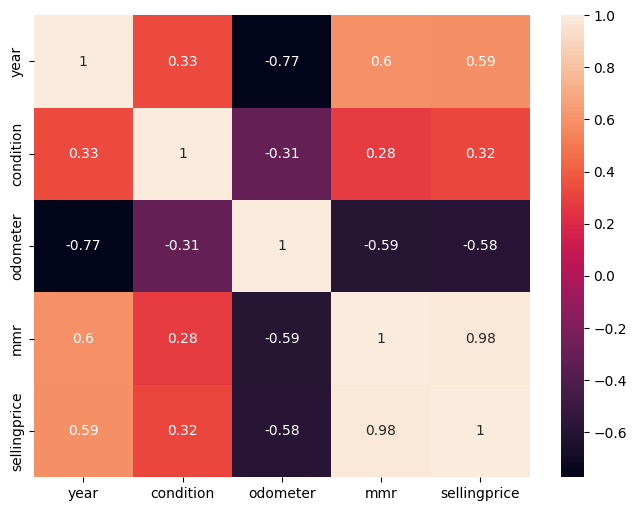

In [39]:
plt.figure(figsize=(8,6))
sb.heatmap(data=df[numerical_columns].corr(), annot=True)
plt.show()

/var/folders/r_/fs8t89rd1mzfn7vs0ld413940000gn/T/ipykernel_1970/1271627384.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr()[['sellingprice']].sort_values(by='sellingprice', ascending=False), annot=True)


<Axes: >

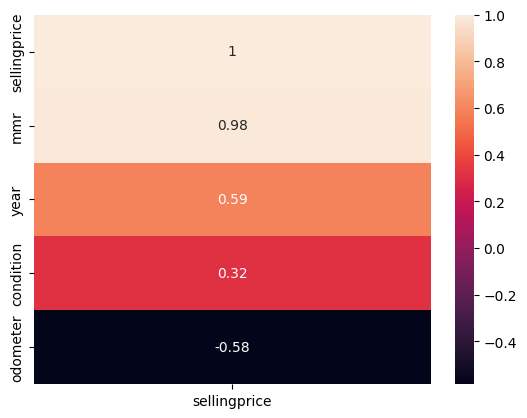

In [40]:
sb.heatmap(df.corr()[['sellingprice']].sort_values(by='sellingprice', ascending=False), annot=True)

# prova in classe
